<a href="https://colab.research.google.com/github/crocokyle/DiamondHands-Chrome-Extension/blob/main/Google_Capstone_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

### Summary

- Upload the new products to your online store. Images and descriptions should be uploaded separately, using two different web endpoints.
- Send a report back to the supplier, letting them know what you imported.
- Run a script on your web server to monitor system health.
- Send an email with an alert if the server is ever unhealthy.

### Description

> You work for an online fruits store, and you need to develop a system that will update the catalog information with data provided by your suppliers. The suppliers send the data as large images with an associated description of the products in two files (.TIF for the image and .txt for the description). The images need to be converted to smaller jpeg images and the text needs to be turned into an HTML file that shows the image and the product description. The contents of the HTML file need to be uploaded to a web service that is already running using Django. You also need to gather the name and weight of all fruits from the .txt files and use a Python request to upload it to your Django server.

>You will create a Python script that will process the images and descriptions and then update your company's online website to add the new products.

>Once the task is complete, the supplier should be notified with an email that indicates the total weight of fruit (in lbs) that were uploaded. The email should have a PDF attached with the name of the fruit and its total weight (in lbs). 

>Finally, in parallel to the automation running, we want to check the health of the system and send an email if something goes wrong.

### Necessary modules

- Python Image Library (PIL) - Tutorial
- Requests (HTTP client library) - Quickstart
- ReportLab (PDF creation library)
- email (constructing email)
- psutil (processes and system utilization)
- shutil (file operations)
- smtplib (sending email)


# PDFs with python

### PDF Text Basics

In [ ]:
!pip3 install reportlab

     |████████████████████████████████| 2.6MB 5.6MB/s 


In [ ]:
fruit = {
  "figs": 1,
  "apples": 2,
  "durians": 3,
  "bananas": 5,
  "cherries": 8,
  "grapes": 13
}

from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, Image
from reportlab.lib.styles import getSampleStyleSheet
styles = getSampleStyleSheet()

report = SimpleDocTemplate("report.pdf")
report_title = Paragraph("A Complete Inventory of My Fruit", styles["h1"])

report.build([report_title])

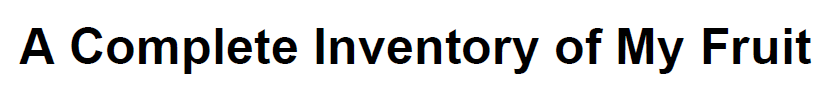

In [ ]:
table_data = []
for k, v in fruit.items():
  table_data.append([k, v])

print(table_data)
report_table = Table(data=table_data)
report.build([report_title, report_table])

[['figs', 1], ['apples', 2], ['durians', 3], ['bananas', 5], ['cherries', 8], ['grapes', 13]]


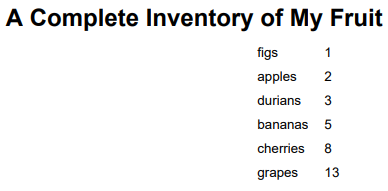

In [ ]:
from reportlab.lib import colors
table_style = [('GRID', (0,0), (-1,-1), 1, colors.black)]
report_table = Table(data=table_data, style=table_style, hAlign="LEFT")
report.build([report_title, report_table])

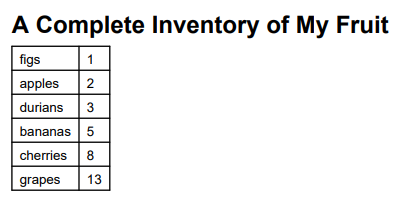

### PDF Graphics

In [ ]:
from reportlab.graphics.shapes import Drawing
from reportlab.graphics.charts.piecharts import Pie
report_pie = Pie(width=3, height=3)

report_pie.data = []
report_pie.labels = []
for fruit_name in sorted(fruit):
   report_pie.data.append(fruit[fruit_name])
   report_pie.labels.append(fruit_name)

print(report_pie.data)

print(report_pie.labels)

[2, 5, 8, 3, 1, 13]
['apples', 'bananas', 'cherries', 'durians', 'figs', 'grapes']


In [ ]:
report_chart = Drawing()
report_chart.add(report_pie)
report.build([report_title, report_table, report_chart])

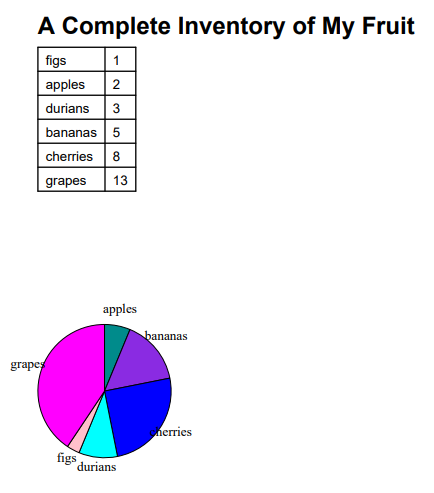

# Email with python

In [ ]:
from email.message import EmailMessage

message = EmailMessage()

sender = "me@example.com"
recipient = "you@example.com"

message['From'] = sender
message['To'] = recipient
message['Subject'] = 'Greetings from {} to {}!'.format(sender, recipient)

body = """Hey there!

I'm learning to send emails using Python!"""
message.set_content(body)

print(message)

From: me@example.com
To: you@example.com
Subject: Greetings from me@example.com to you@example.com!
Content-Type: text/plain; charset="utf-8"
Content-Transfer-Encoding: 7bit
MIME-Version: 1.0

Hey there!

I'm learning to send emails using Python!





```python
import os.path
attachment_path = "example.png"
attachment_filename = os.path.basename(attachment_path)

import mimetypes
mime_type, _ = mimetypes.guess_type(attachment_path)
print(mime_type)
```
image/png


```python
mime_type, mime_subtype = mime_type.split('/', 1)
print(mime_type)
```
image
```python
print(mime_subtype)
```
png



```python
with open(attachment_path, 'rb') as ap:
    message.add_attachment(ap.read(),
                            maintype=mime_type,
                            subtype=mime_subtype,
                            filename=os.path.basename(attachment_path))
    
    print(message)
```

Content-Type: multipart/mixed; boundary="===============5350123048127315795=="

--===============5350123048127315795==
Content-Type: text/plain; charset="utf-8"
Content-Transfer-Encoding: 7bit

Hey there!

I'm learning to send email using Python!

--===============5350123048127315795==
Content-Type: image/png
Content-Transfer-Encoding: base64
Content-Disposition: attachment; filename="example.png"
MIME-Version: 1.0

iVBORw0KGgoAAAANSUhEUgAAASIAAABSCAYAAADw69nDAAAACXBIWXMAAAsTAAALEwEAmpwYAAAg
AElEQVR4nO2dd3wUZf7HP8/M9k2nKIJA4BCUNJKgNJWIBUUgEggCiSgeVhA8jzv05Gc5z4KHiqin
eBZIIBDKIXggKIeCRCAhjQAqx4UiCARSt83uzDy/PzazTDZbwy4BnHde+9qZydNn97Pf5/uUIZRS
(...We deleted a bunch of lines here...)
wgAAAABJRU5ErkJggg==

--===============5350123048127315795==--

```python
import smtplib
mail_server = smtplib.SMTP('localhost') # might not have a configured mail server
```
```python
import getpass
mail_server = smtplib.SMTP_SSL('smtp.example.com')
mail_pass = getpass.getpass('Password? ')
mail_server.login(sender, mail_pass)

mail_server.send_message(message)

mail_server.quit() # Close the connection to the mail server
```

### Lab Experiments


In [ ]:
with open("car_sales.json") as json_file:
    data = json.load(json_file)

for item in data:
  display(item["car"]["car_year"])

In [62]:
import sys
import json
import locale
import pandas as pd

def load_data(filename):
  """Loads the contents of filename as a JSON file."""
  with open(filename) as json_file:
    data = json.load(json_file)
  return data

def format_car(car):
  """Given a car dictionary, returns a nicely formatted name."""
  return "{} {} ({})".format(
      car["car_make"], car["car_model"], car["car_year"])

def process_data(data):
  """Analyzes the data, looking for maximums.

  Returns a list of lines that summarize the information.
  """
  max_revenue = {"revenue": 0}
  model_sales = {"total_sales": 0}
  year_sales = {}
  for item in data:
    # Calculate the revenue generated by this model (price * total_sales)
    # We need to convert the price from "$1234.56" to 1234.56
    item_price = locale.atof(item["price"].strip("$"))
    item_revenue = item["total_sales"] * item_price
    if item_revenue > max_revenue["revenue"]:
      item["revenue"] = item_revenue
      max_revenue = item

    # Gets the model with the highest number of sales
    if item["total_sales"] > model_sales["total_sales"]:
      model_sales = item

    # Gets the most popular year (by number of sales NOT revenue)
    if item["car"]["car_year"] in year_sales:
      year_sales[item["car"]["car_year"]] += item["total_sales"]
    else:
      year_sales[item["car"]["car_year"]] = item["total_sales"]

  max_year = max(year_sales, key=year_sales.get)
  max_year_sales = year_sales[max_year]

  summary = [
    "The {} generated the most revenue: ${}".format(
      format_car(max_revenue["car"]), max_revenue["revenue"]),
    "The {} had the most sales: {}".format(format_car(model_sales["car"]), model_sales["total_sales"]),
    "The most popular year was {} with {} sales.".format(max_year, max_year_sales)
  ]

  return summary

def cars_dict_to_table(car_data):
  """Turns the data in car_data into a list of lists."""
  table_data = [["ID", "Car", "Price", "Total Sales"]]
  for item in car_data:
    table_data.append([item["id"], format_car(item["car"]), item["price"], item["total_sales"]])
  return table_data


def main(argv):
  """Process the JSON data and generate a full report out of it."""
  data = load_data("car_sales.json")
  summary = process_data(data)
  email_summary_string = "\n".join(summary)
  report_summary_string = "<br/>".join(summary)
  # Create a PDF report
  table_data = cars_dict_to_table(data)
  df = pd.DataFrame(table_data[1:], columns = table_data[0]).sort_values(by=['Total Sales'], ascending=False)
  display(df)
  headers = [list(df)]
  headers.extend(df.values.tolist())
  reports.generate("/tmp/cars.pdf", "Car Sales Report", report_summary_string, headers)

  # TODO: send the PDF report as an email attachment
  sender = "automation@example.com"
  receiver = "{}@example.com".format(os.environ.get('USER'))
  subject = "Sales summary for last month"
  body = email_summary_string
  message = emails.generate(sender, receiver, subject, body, "/tmp/cars.pdf")
  emails.send(message)


if __name__ == "__main__":
  main(sys.argv)

,ID,Car,Price,Total Sales
461,462,Acura Integra (1995),$18731.76,1192
484,485,Hyundai Sonata (2008),$12011.32,1189
261,262,Mazda MX-5 (1999),$8202.60,1188
319,320,Lexus GS (2003),$18333.09,1184
457,458,Saab 900 (1987),$7236.77,1183
...,...,...,...,...
383,384,Mercedes-Benz SLS-Class (2011),$18044.75,96
108,109,Ford Mustang (1995),$9642.12,90
272,273,Volvo V50 (2008),$14039.48,87
314,315,Oldsmobile LSS (1999),$15625.42,83


NameError: ignored

In [ ]:
#!/usr/bin/env python3
import emails
import os
import reports
table_data=[
  ['Name', 'Amount', 'Value'],
  ['elderberries', 10, 0.45],
  ['figs', 5, 3],
  ['apples', 4, 2.75],
  ['durians', 1, 25],
  ['bananas', 5, 1.99],
  ['cherries', 23, 5.80],
  ['grapes', 13, 2.48],
  ['kiwi', 4, 0.49]]
reports.generate("/tmp/report.pdf", "A Complete Inventory of My Fruit", "This is all my fruit.", table_data)
sender = "automation@example.com"
receiver = "{}@example.com".format(os.environ.get('USER'))
subject = "List of Fruits"
body = "Hi\n\nI'm sending an attachment with all my fruit."
message = emails.generate(sender, receiver, subject, body, "/tmp/report.pdf")
emails.send(message)

In [ ]:
sample_JSON_object = {
        "id": 47,
        "car": {
                "car_make": "Lamborghini",
                "car_model": "Murciélago",
                "car_year": 2002
        },
        "price": "$13724.05",
        "total_sales": 149
}

<hr></hr>

# Django web API with python

In [ ]:
#! /usr/bin/env python3

In [ ]:
sample_text_review = "Good deal for a 2015 RAV4\nAnonymous\n2018-04-17\nCalled them to look for a second-hand RAV4 and they are very nice and patient to help me find a few matches then scheduled an appointment with me. I was surprised how professional those sales are and they explained and answered all my questions. Ended up buying the car and been using it for more than a month now. Everything looks good!"
print(sample_text_review)

Good deal for a 2015 RAV4
Anonymous
2018-04-17
Called them to look for a second-hand RAV4 and they are very nice and patient to help me find a few matches then scheduled an appointment with me. I was surprised how professional those sales are and they explained and answered all my questions. Ended up buying the car and been using it for more than a month now. Everything looks good!


In [ ]:
import json

review = {}
line_list = []
with open("sample_review.txt") as file:
    for line in file.readlines():
        line_list.append(line[:-1]) # Remove \n

    review['title'] = line_list[0]
    review['name'] = line_list[1]
    review['date'] = line_list[2]
    review['feedback'] = line_list[3]

print(review)
json_review = json.dumps(review)  
print(json_review)


{'title': 'Good deal for a 2015 RAV4', 'name': 'Anonymous', 'date': '2018-04-17', 'feedback': 'Called them to look for a second-hand RAV4 and they are very nice and patient to help me find a few matches then scheduled an appointment with me. I was surprised how professional those sales are and they explained and answered all my questions. Ended up buying the car and been using it for more than a month now. Everything looks good'}
{"title": "Good deal for a 2015 RAV4", "name": "Anonymous", "date": "2018-04-17", "feedback": "Called them to look for a second-hand RAV4 and they are very nice and patient to help me find a few matches then scheduled an appointment with me. I was surprised how professional those sales are and they explained and answered all my questions. Ended up buying the car and been using it for more than a month now. Everything looks good"}


In [ ]:
#! /usr/bin/env python3
import os
import requests
import json

web_dir = "/projects/corpweb"
review_dir = "/data/feedback"
url = "http://34.122.126.167/feedback/"

def main():

    for file in os.listdir(review_dir):
        review = {}
        line_list = []
        with open(os.path.join(review_dir, file)) as f:
            for line in f.readlines():
                line_list.append(line[:-1]) # Remove \n

            review['title'] = line_list[0]
            review['name'] = line_list[1]
            review['date'] = line_list[2]
            review['feedback'] = line_list[3]

        x = requests.post(url, json=review)
        if not x.ok:
            print(x.status_code)
            print(x.text)

main()


In [ ]:
sample_JSON_review = {
    "title": "Experienced salespeople", 
    "name": "Alex H.", 
    "date": "2020-02-02", 
    "feedback": "It was great to talk to the salespeople in the team, they understood my needs and were able to guide me in the right direction"
    }

<hr></hr>


# Image manipulation with python

In [ ]:
!pip3 install pillow

In [ ]:
import os
os.system('curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$11hg55-dKdHN63yJP20dMLAgPJ5oiTOHF" > /dev/null | curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk \'/download/ {print $NF}\' ./cookie`&id=11hg55-dKdHN63yJP20dMLAgPJ5oiTOHF" -o images.zip && sudo rm -rf cookie')
os.system("unzip images.zip")

0

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline

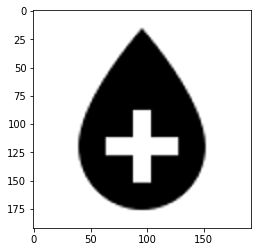

In [ ]:
im = Image.open("/content/images/ic_add_location_black_48dp")
imshow(im.rotate(270))

In [ ]:
dir = "images"
targetdir = "icons" 
os.mkdir(targetdir)
for pic in os.listdir(dir):
  if ".DS_Store" not in pic:
    im = Image.open(os.path.join(dir, pic))
    im.resize((128, 128)).rotate(270).convert('RGB').save(os.path.join(targetdir, pic + ".jpeg"))

In [ ]:
os.system("rm -r -f icons")

0